In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Gas Prices

In [9]:
# Gas Prices
df = pd.read_csv('gas_prices.csv')
df.head()

Year  Australia  Canada  France  Germany  Italy  Japan  Mexico  \
0  1990        NaN    1.87    3.63     2.65   4.59   3.16    1.00   
1  1991       1.96    1.92    3.45     2.90   4.50   3.46    1.30   
2  1992       1.89    1.73    3.56     3.27   4.53   3.58    1.50   
3  1993       1.73    1.57    3.41     3.07   3.68   4.16    1.56   
4  1994       1.84    1.45    3.59     3.52   3.70   4.36    1.48   

   South Korea    UK   USA  
0         2.05  2.82  1.16  
1         2.49  3.01  1.14  
2         2.65  3.06  1.13  
3         2.88  2.84  1.11  
4         2.87  2.99  1.11

In [6]:
df.isnull().sum()

Year           0
Australia      1
Canada         0
France         0
Germany        0
Italy          0
Japan          0
Mexico         0
South Korea    0
UK             0
USA            0
dtype: int64

In [11]:
df.fillna(df.mean(numeric_only=True), inplace=True)

In [15]:
df.isnull().any()

Year           False
Australia      False
Canada         False
France         False
Germany        False
Italy          False
Japan          False
Mexico         False
South Korea    False
UK             False
USA            False
dtype: bool

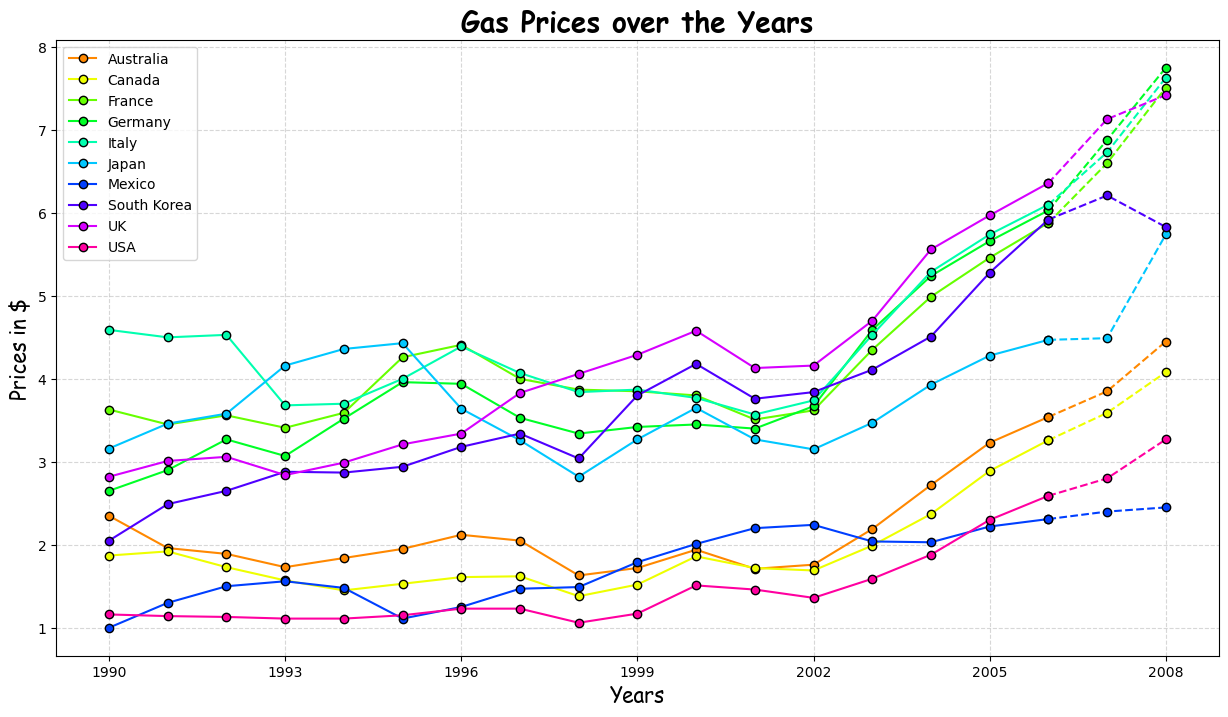

In [85]:
n = len(df.columns[1:])  # number of distinct colors
colors = sns.color_palette("hsv", n)  # or try "tab10", "husl", "Set2", etc.

plt.figure(figsize=(15,8))

for idx, con in enumerate(df.columns[1:]):
    color = colors[idx]
    plt.plot(df['Year'][:-2], df[con][:-2], 'o-',color=color, markeredgecolor='black', label=con)
    plt.plot(df['Year'][-3:], df[con][-3:], 'o--',color=color, markeredgecolor='black')

plt.title('Gas Prices over the Years', fontdict={'fontname': 'Comic Sans MS', 'fontweight': 'bold', 'fontsize':20})
plt.xlabel('Years', fontdict={'fontname': 'Comic Sans MS', 'fontsize':15})
plt.ylabel('Prices in $', fontdict={'fontname': 'Comic Sans MS', 'fontsize':15})
plt.xticks(df['Year'][::3])
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig('Gas Prices.png', dpi=600)
plt.show()

### Fifa Description

In [221]:
df = pd.read_csv('fifa_data.csv')
df.head()

Unnamed: 0      ID               Name  Age  \
0           0  158023           L. Messi   31   
1           1   20801  Cristiano Ronaldo   33   
2           2  190871          Neymar Jr   26   
3           3  193080             De Gea   27   
4           4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club  ... Composure Marking StandingTackle  SlidingTackle  \
0         FC Barcelona  ...      96.0    33.0           28.0           26.0   
1             Juventus  ...      95.0    28.0           31.0           23.0   
2  Paris Saint-Germain  ...      94.0    27.0           24.0           33.0   
3    Manchester United  ...      68.0    15.0           21.0           13.0   
4      Manchester City  ...      88.0    68.0           58.0           51.0   

  GKDiving  GKHandling  GKKicking  GKPositioning GKReflexes Release Clause  
0      6.0        11.0       15.0           14.0        8.0        €226.5M  
1      7.0        11.0       15.0           14.0       11.0        €127.1M  
2      9.0         9.0       15.0           15.0       11.0        €228.1M  
3     90.0        85.0       87.0           88.0       94.0        €138.6M  
4     15.0        13.0        5.0           10.0       13.0        €196.4M  

[5 rows x 89 columns]

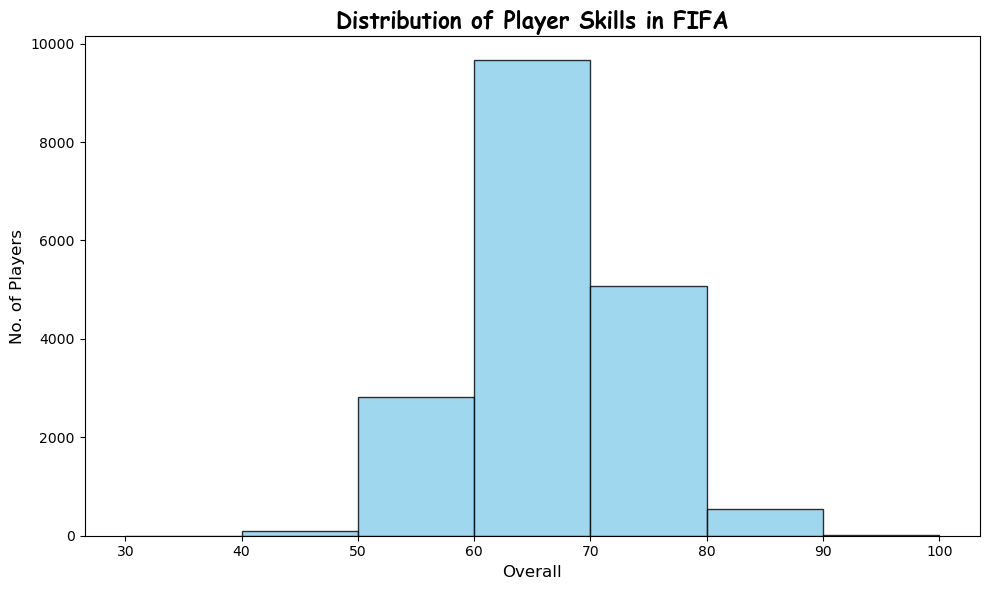

In [127]:
# Histogram
bins = np.arange(30,110,10).tolist()

plt.figure(figsize=(10, 6))
plt.hist(df['Overall'].dropna(), bins=bins, edgecolor='black', color='skyblue', alpha=0.8)
plt.title('Distribution of Player Skills in FIFA', fontsize=16, fontweight='bold', fontname='Comic Sans MS')
plt.xlabel('Overall', fontsize=12)
plt.ylabel('No. of Players', fontsize=12)
plt.xticks(bins)
plt.tight_layout()
plt.show()

### Pie Charts

In [145]:
df.columns[df.nunique()<10].tolist()

['Preferred Foot',
 'International Reputation',
 'Weak Foot',
 'Skill Moves',
 'Work Rate',
 'Real Face']

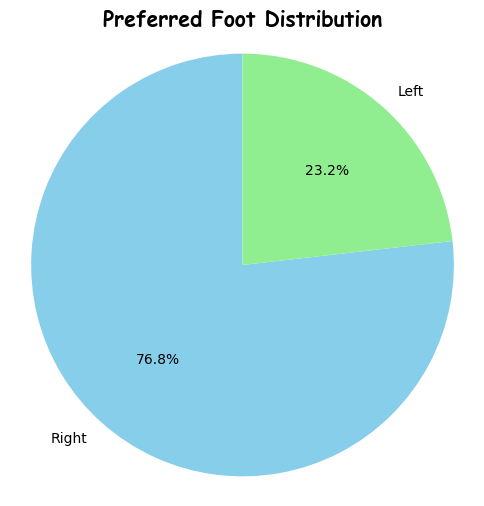

In [172]:
foots = df['Preferred Foot'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(foots, labels=foots.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
plt.title('Preferred Foot Distribution', fontname='Comic Sans MS', fontweight='bold', fontsize=15)
plt.axis('equal')  # makes the pie a circle
plt.show()

In [213]:
df['Weight'].head()

0    159lbs
1    183lbs
2    150lbs
3    168lbs
4    154lbs
Name: Weight, dtype: object

In [215]:
df['Weight'] = pd.to_numeric(df['Weight'].str.replace('lbs', '').str.strip())
df['Weight'].head()

0    159.0
1    183.0
2    150.0
3    168.0
4    154.0
Name: Weight, dtype: float64

In [220]:
df['Weight'] = df['Weight'].fillna(df['Weight'].mean())

In [219]:
df['Weight'] = df['Weight'].astype(int)
df['Weight'].head()

0    159
1    183
2    150
3    168
4    154
Name: Weight, dtype: int32

In [225]:
df['Weight'] = [int(x.strip('lbs')) if type(x)==str else x for x in df['Weight']]
df['Weight'] = df['Weight'].fillna(df['Weight'].mean())

In [257]:
light = (df['Weight']<150).sum()
med = ((df['Weight']>=150) & (df['Weight']<200)).sum()
heavy = (df['Weight']>=200).sum()

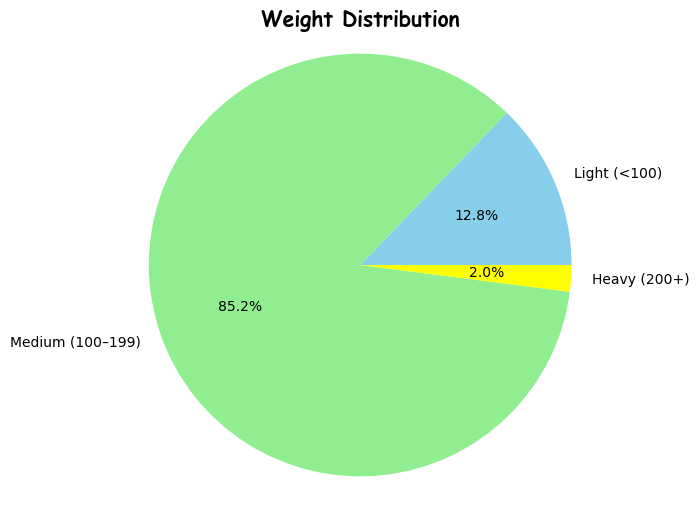

In [260]:
# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    [light, med, heavy],
    labels=['Light (<100)', 'Medium (100–199)', 'Heavy (200+)'],  
    autopct='%1.1f%%', 
    colors=['skyblue', 'lightgreen', 'yellow'])
plt.title('Weight Distribution', fontname='Comic Sans MS', fontweight='bold', fontsize=15)
plt.axis('equal')  # keeps the pie chart circular
plt.show()

### Boxplot

In [278]:
barcelona = df[df['Club'] == 'FC Barcelona']['Overall']
madrid = df[df['Club'] == 'Real Madrid']['Overall']
england = df[df['Club'] == 'New England Revolution']['Overall']

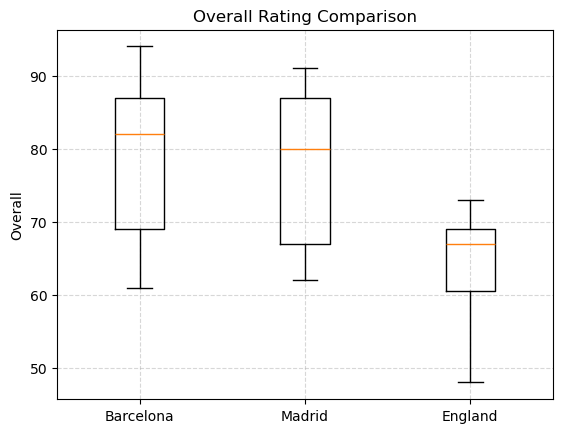

In [279]:
plt.boxplot([barcelona, madrid, england], tick_labels=['Barcelona', 'Madrid', 'England'])
plt.title('Overall Rating Comparison')
plt.ylabel('Overall')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()